In [3]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pdb
import matplotlib.pyplot as plt
import h5py    
import pandas as pd

import sklearn
print(sklearn.__version__)

import seaborn as sns

1.1.2


In [13]:
data_path = "/Users/marchuertascompany/Documents/data/CEERS/stellarpops/"
ceers_cat = pd.read_csv(data_path+"specz_PG_matched_SFR_mstar_z_RADEC_morphADV_200_356_400_4class.csv")
candels_ceers = pd.read_csv(data_path+"CANDELS_CEERS_match.csv")

/Users/marchuertascompany/soft/miniforge3/envs/dl4astro19/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (556,557,558,559,560,561,562,563,564,565,566,567,568,569,582,583,584,585,586,587,588,589,590,591,592,593) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
morph_flag=[]

for sph,dk,irr,bd in zip(ceers_cat.sph_356,ceers_cat.disk_356,ceers_cat.irr_356,ceers_cat.bd_356):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
ceers_cat['morph_flag_f356']=np.array(morph_flag)

morph_flag=[]

for sph,dk,irr,bd in zip(ceers_cat.sph_200,ceers_cat.disk_200,ceers_cat.irr_200,ceers_cat.bd_200):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f200']=np.array(morph_flag)


morph_flag=[]

for sph,dk,irr,bd in zip(ceers_cat.sph_444,ceers_cat.disk_444,ceers_cat.irr_444,ceers_cat.bd_444):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f444']=np.array(morph_flag)

ceers_cat.to_csv(data_path+"CEERS_v01_specz_PG_matched_SFR_mstar_z_RADEC_morphADV_200_356_400_4class_morphflag.csv")

In [51]:
morph_flag=[]

for fsph,fdk,firr in zip(candels_ceers.F_SPHEROID,candels_ceers.F_DISK,candels_ceers.F_IRR):
    
     if (fsph>=0.66 and fdk<0.66 and firr<0.1):
        morph_flag.append(0)
     elif (fsph<0.66 and fdk>=0.66 and firr<0.1):
        morph_flag.append(1)
     elif (firr>=0.1):
        morph_flag.append(2)   
     elif (fsph>0.66 and fdk>0.66 and firr<0.1):
        morph_flag.append(3)            
     else:
        morph_flag.append(-1)  
    
candels_ceers['morph_CANDELS']=np.array(morph_flag)

morph_flag=[]

for sph,dk,irr,bd in zip(candels_ceers.sph_200,candels_ceers.disk_200,candels_ceers.irr_200,candels_ceers.bd_200):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f200']=np.array(morph_flag)

morph_flag=[]
for sph,dk,irr,bd in zip(candels_ceers.sph_356,candels_ceers.disk_356,candels_ceers.irr_356,candels_ceers.bd_356):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f356']=np.array(morph_flag)

morph_flag=[]
for sph,dk,irr,bd in zip(candels_ceers.sph_444,candels_ceers.disk_444,candels_ceers.irr_444,candels_ceers.bd_444):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f444']=np.array(morph_flag)


candels_ceers.to_csv(data_path+"CANDELS_CEERS_match_morphflag.csv")

Text(0, 0.5, '$\\log M_*/M_\\odot$')

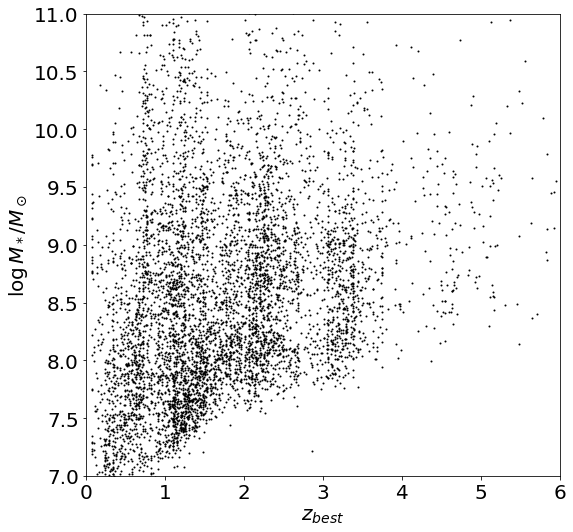

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.scatter(ceers_cat.z,ceers_cat.mass,s=1,color='black')
plt.xlabel("$z_{best}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)

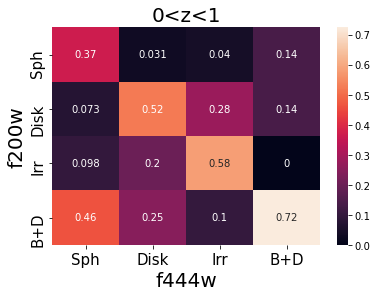

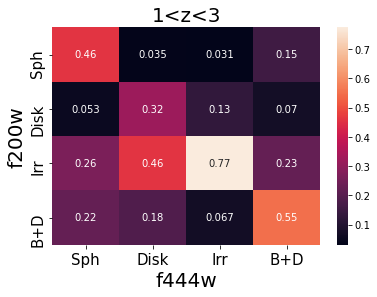

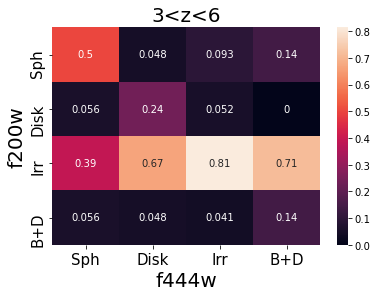

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200, sel.morph_flag_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444.png")
    plt.show()
   

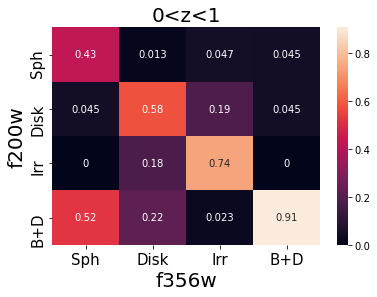

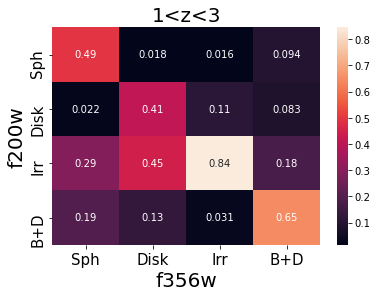

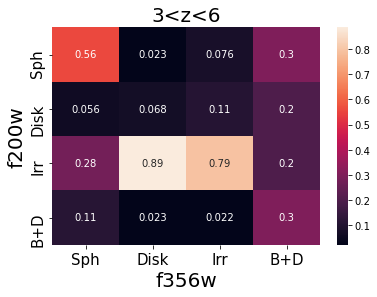

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200, sel.morph_flag_f356,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f356w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f356.png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

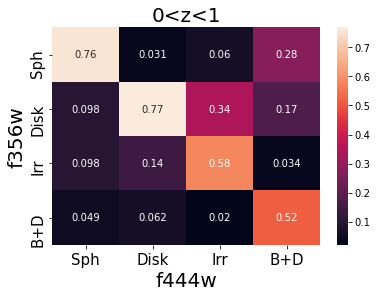

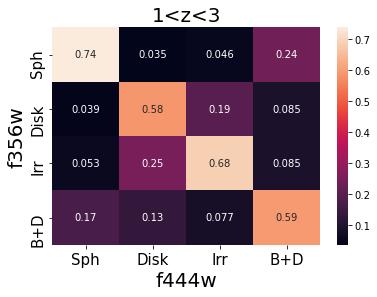

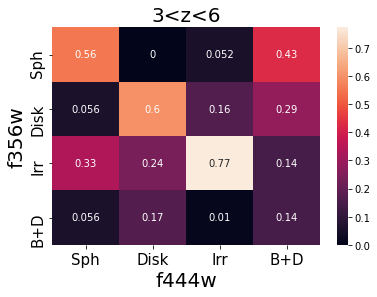

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f356, sel.morph_flag_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f356w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

Only CEERS

[197 125  88  61  27   9]
[367 266 146  96  49   8]
[367 242 129  65  41   7]
[201 140  56  31  10   6]
[46 40 39 11  6  5]


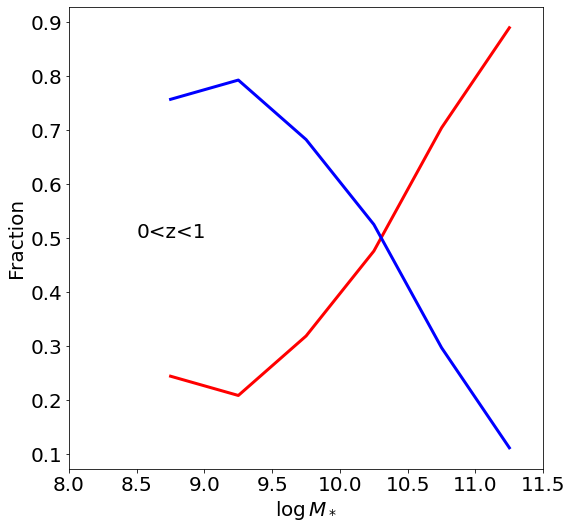

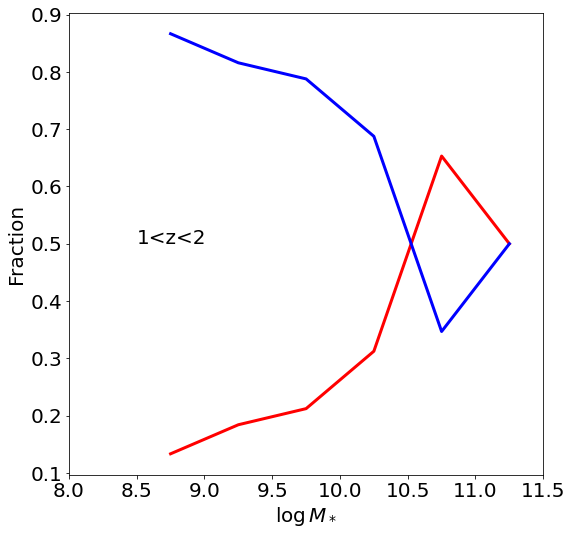

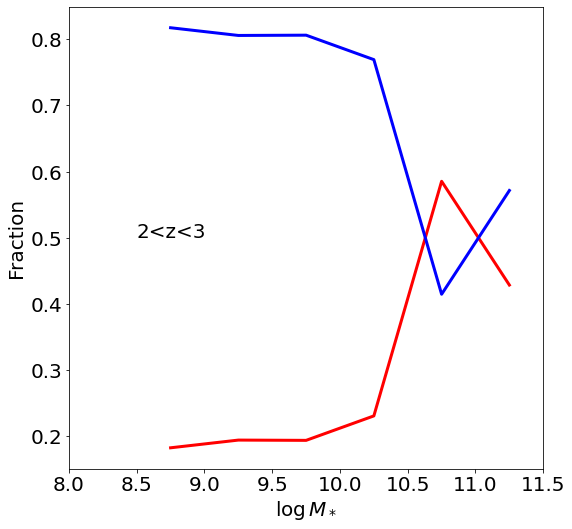

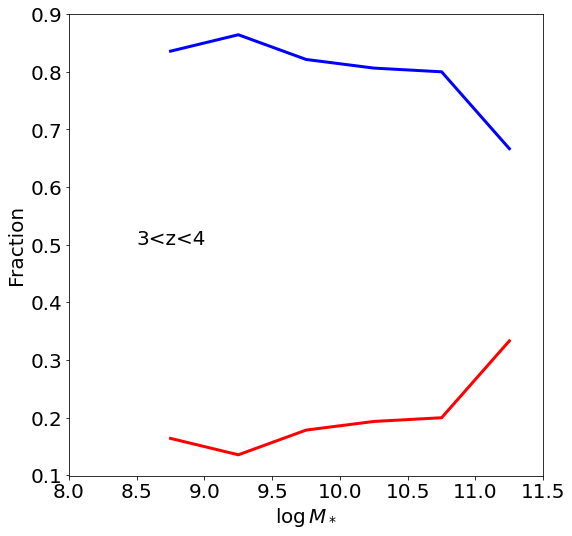

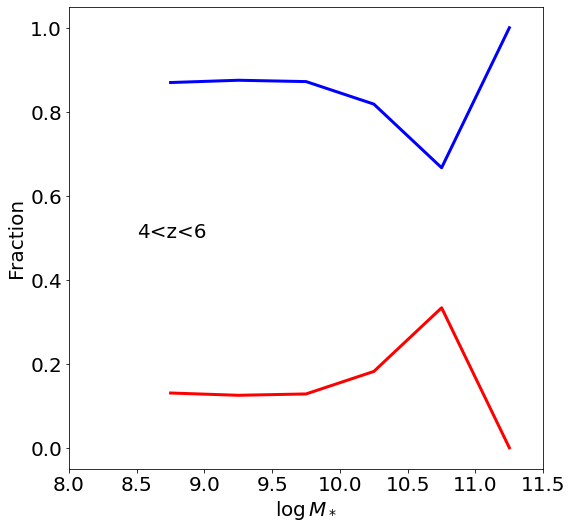

In [10]:
zbins = [0,1,2,3,4,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f200

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

[197 125  88  61  27   9]
[367 266 146  96  49   8]
[367 242 129  65  41   7]
[201 140  56  31  10   6]
[46 40 39 11  6  5]


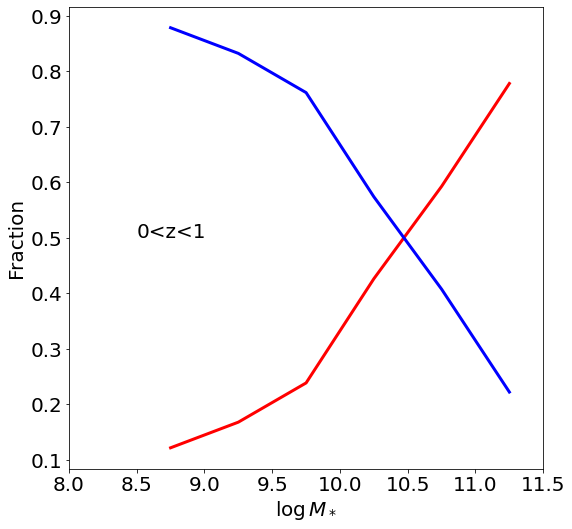

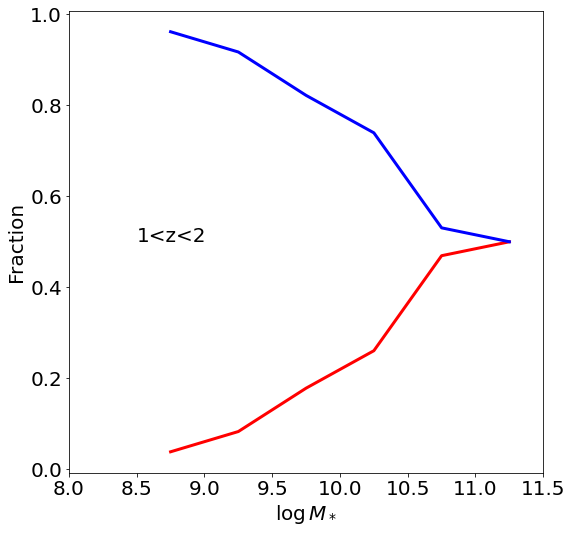

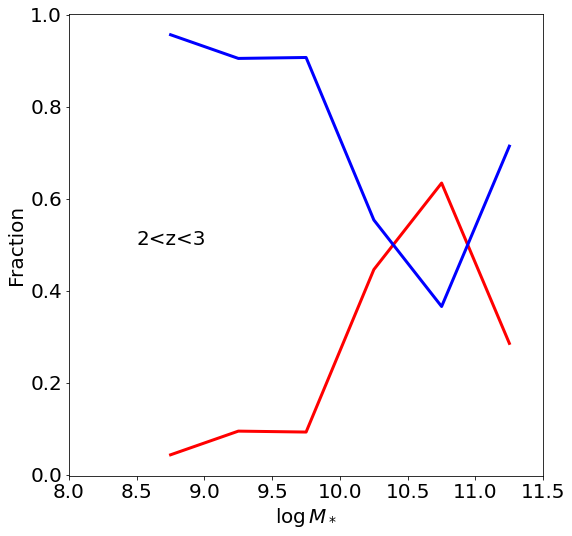

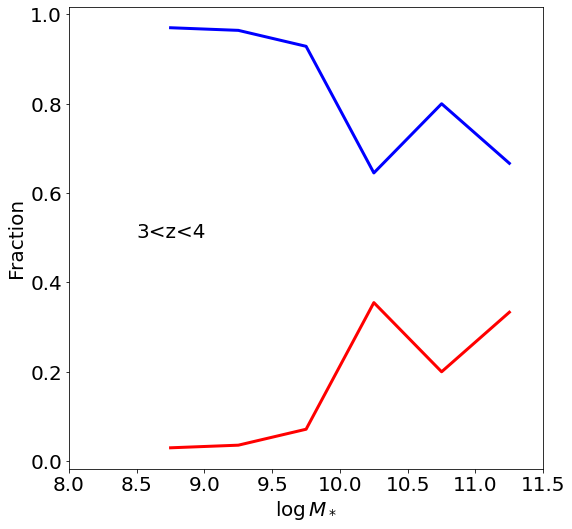

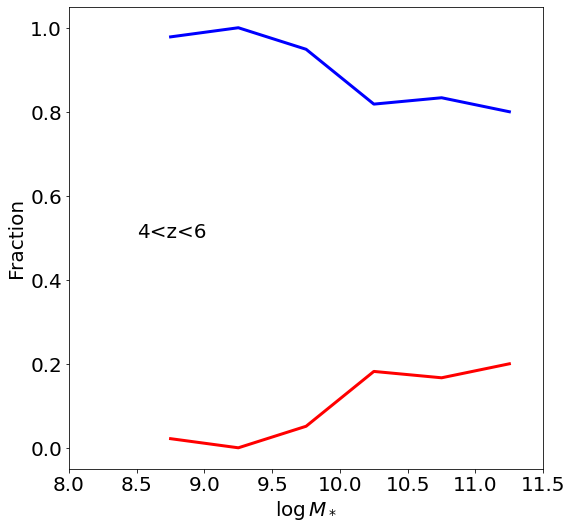

In [11]:
zbins = [0,1,2,3,4,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f444

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

[197 125  88  61  27   9]
[367 266 146  96  49   8]
[367 242 129  65  41   7]
[201 140  56  31  10   6]
[46 40 39 11  6  5]


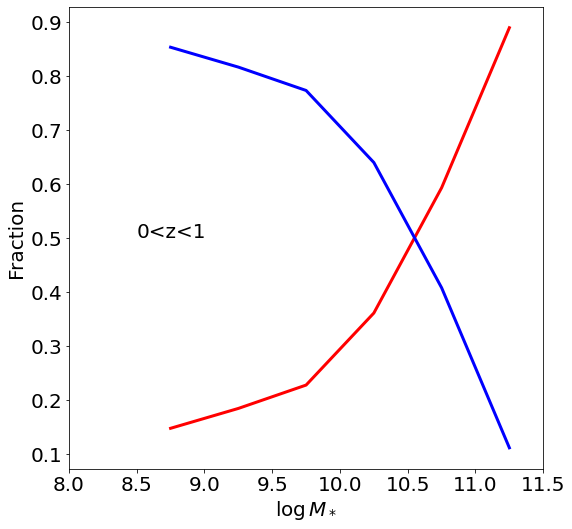

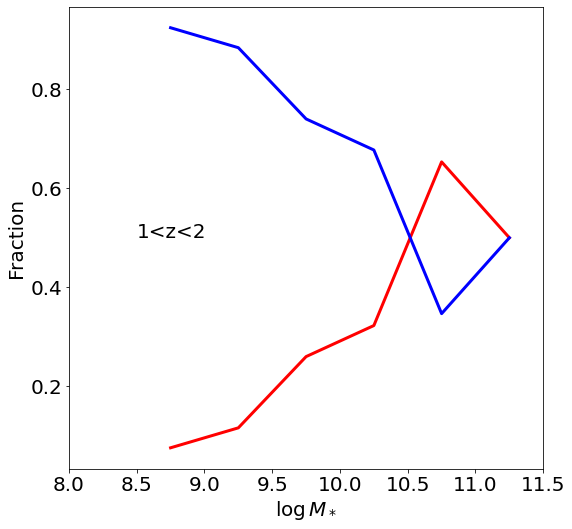

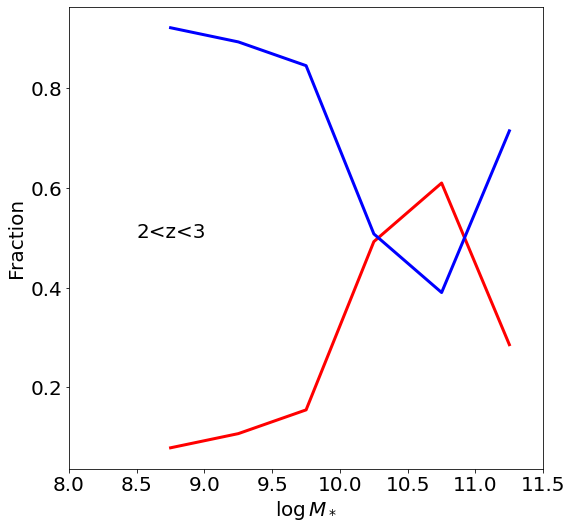

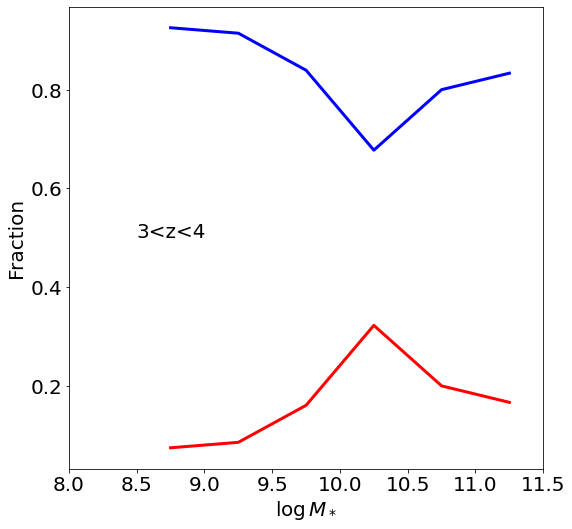

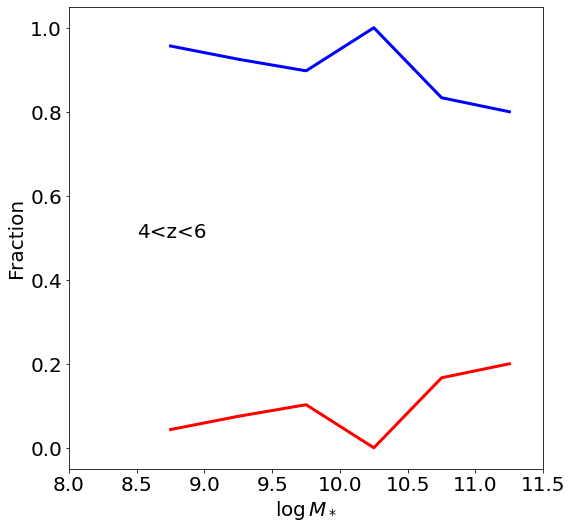

In [12]:
zbins = [0,1,2,3,4,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f356

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

[197 125  88  61  27   9]
[0.06091371 0.096      0.09699885 0.21109663 0.16126847 0.30710356]
[0.10152284 0.16       0.17572843 0.34628042 0.35725005 0.80400755]
[735 510 276 161  90  15]
[0.01632653 0.04098231 0.06595713 0.13542762 0.19232871 0.13333333]
[0.02721088 0.06097847 0.10070953 0.1999761  0.29656018 0.4       ]
[247 180  95  42  16  11]
[0.01437454 0.01535518 0.03737379 0.12313269 0.07924682 0.        ]
[0.03420846 0.04020038 0.088942   0.25781969 0.29575318 0.18181818]


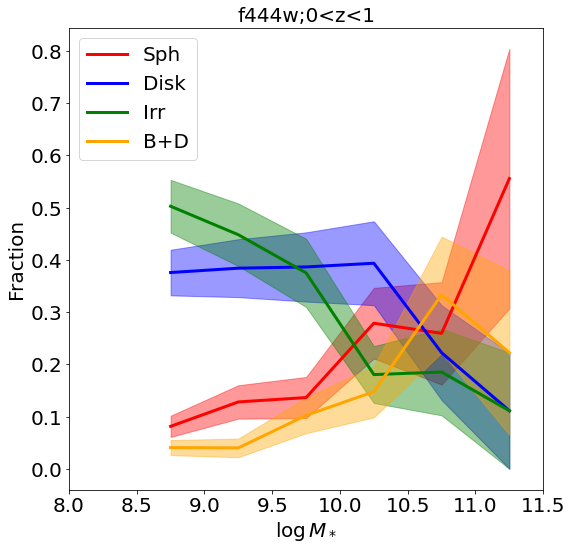

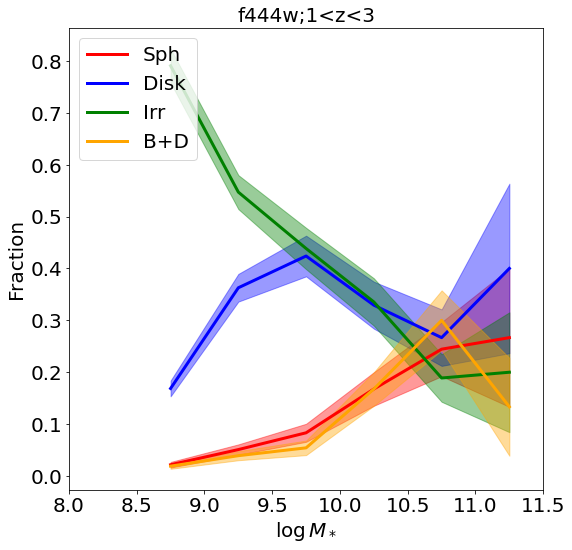

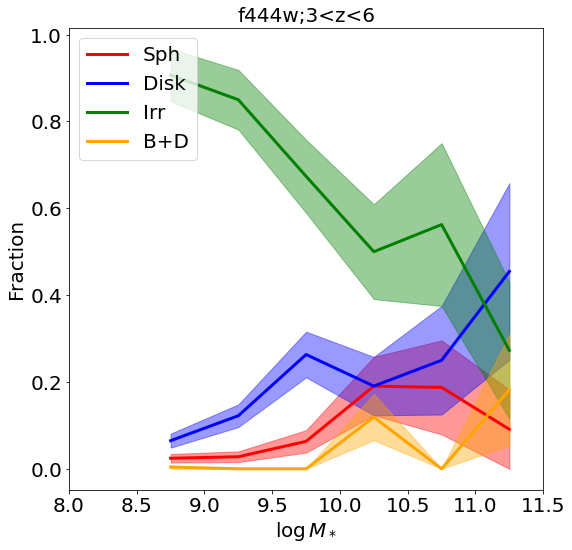

In [28]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f444

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f444.png")
    

[197 125  88  61  27   9]
[0.05648232 0.08206674 0.08731108 0.18241011 0.28456945 0.48380541]
[0.09580195 0.14193326 0.16268892 0.30939317 0.53024536 1.07175015]
[735 510 276 161  90  15]
[0.03089591 0.03219103 0.08885063 0.17496303 0.20226854 0.03905243]
[0.04529456 0.05016191 0.12854067 0.24739722 0.30884257 0.22761424]
[247 180  95  42  16  11]
[0.02768309 0.03798735 0.02909402 0.12313269 0.07924682 0.05325331]
[0.05328857 0.07312376 0.07616914 0.25781969 0.29575318 0.31038305]


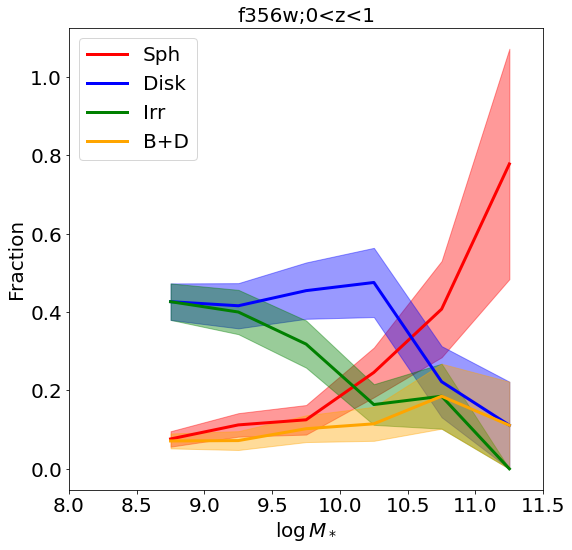

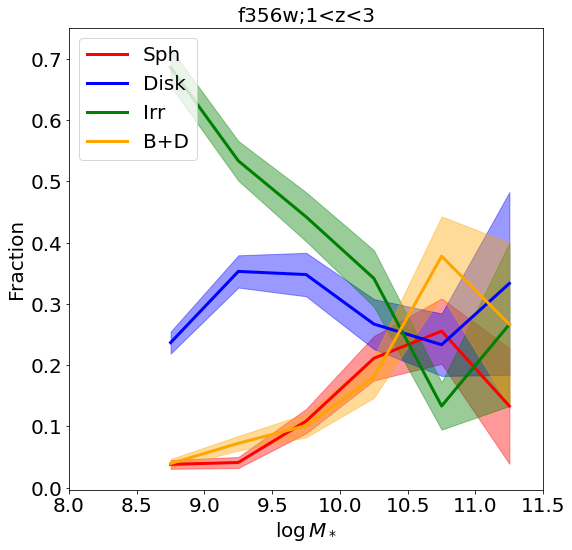

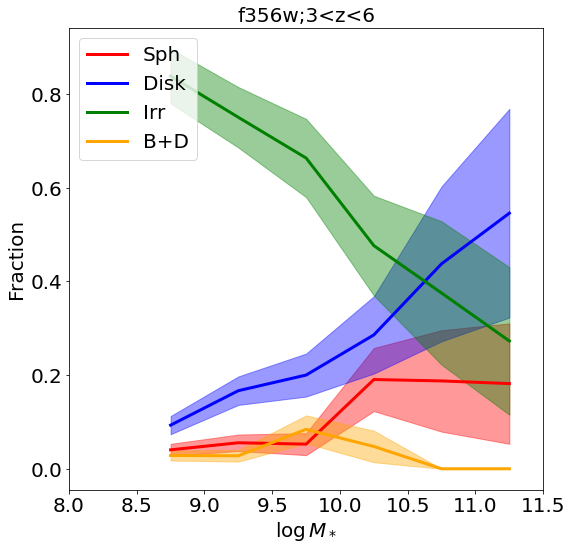

In [30]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f356

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[197 125  88  61  27   9]
[735 510 276 161  90  15]
[247 180  95  42  16  11]


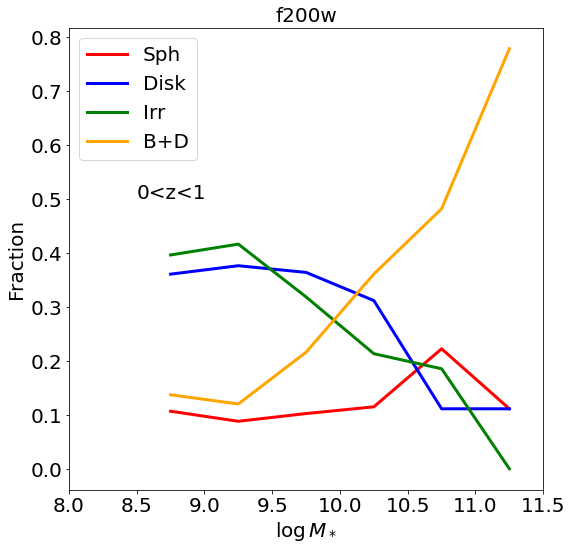

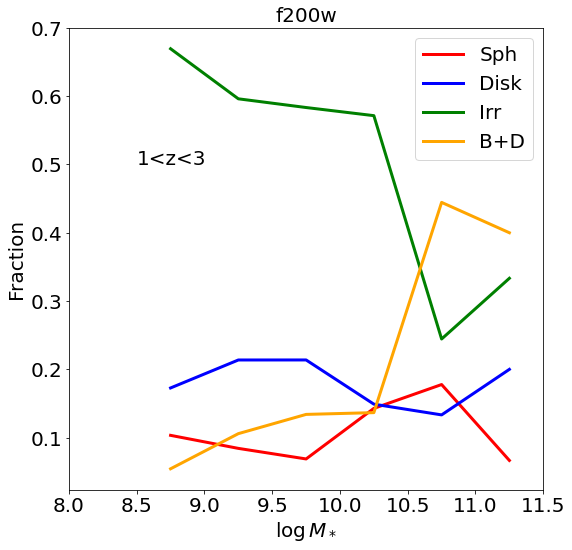

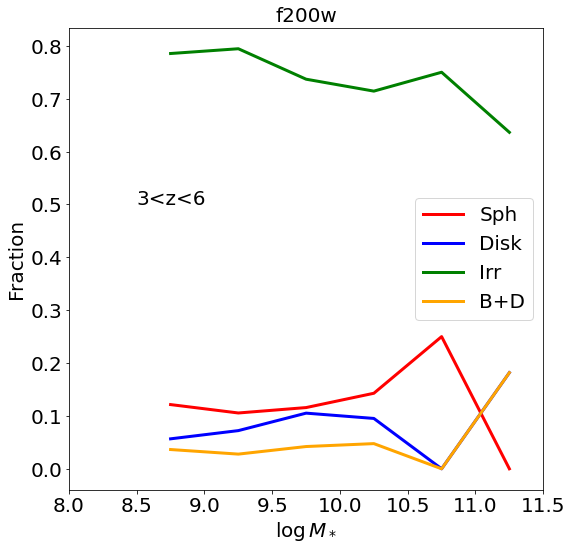

In [39]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f200

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label='B+D')
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f200w",fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

CEERS - CANDELS

[168 114  76  57  27   9]
[217 312 247 149  83  14]
[ 6 12 21 21  7  9]


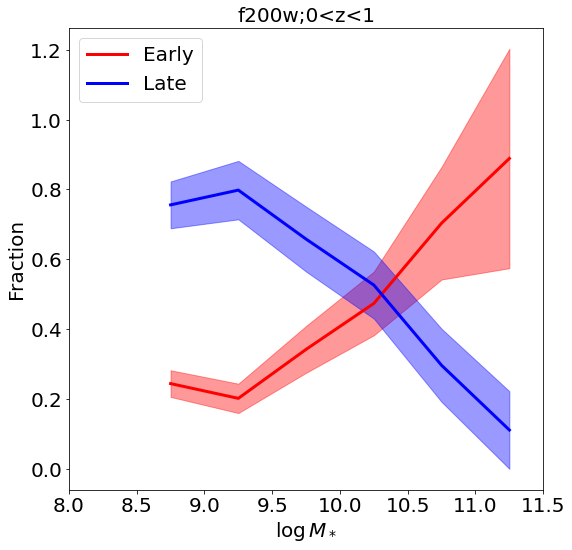

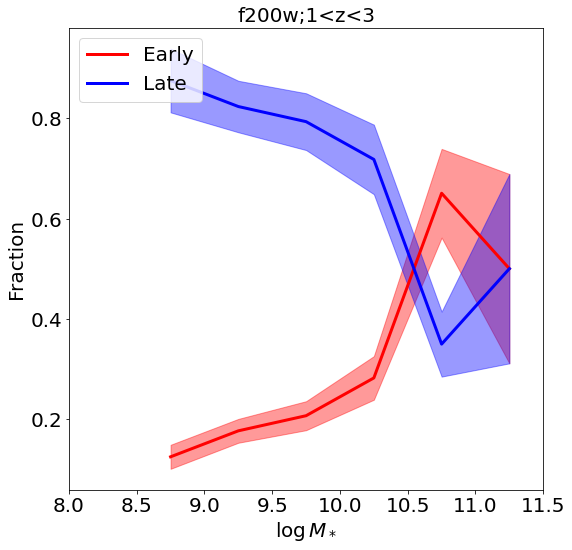

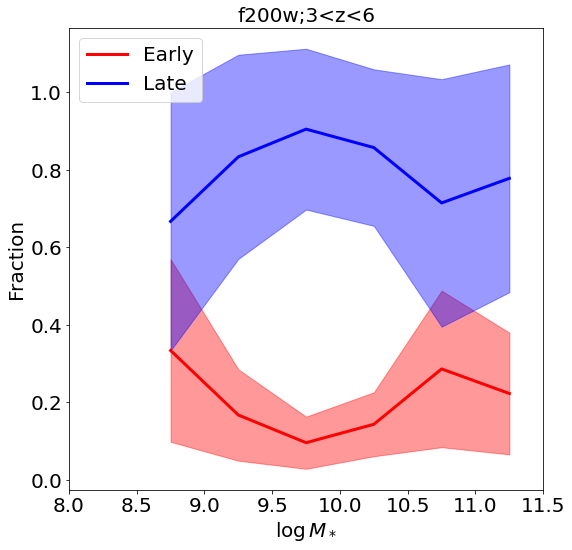

In [36]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f200

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_CANDELS-CEERS.png")

[168 114  76  57  27   9]
[217 312 247 149  83  14]
[ 6 12 21 21  7  9]


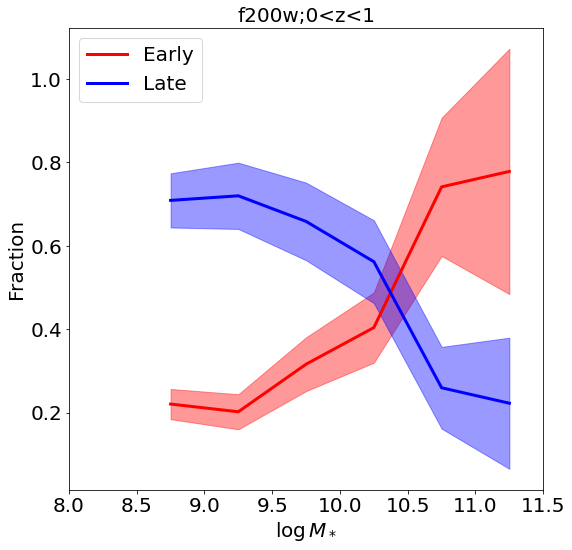

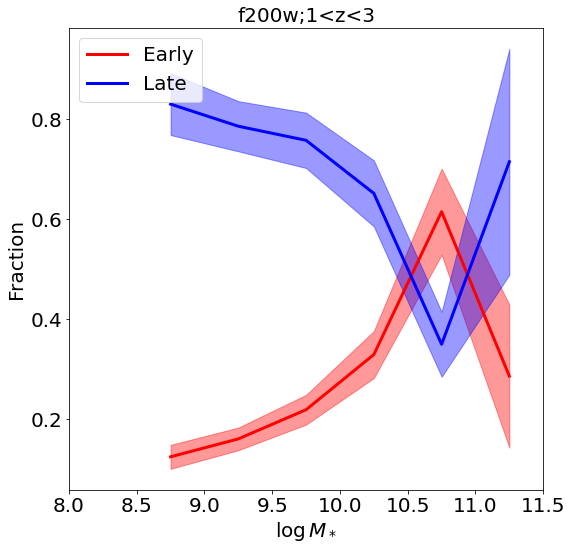

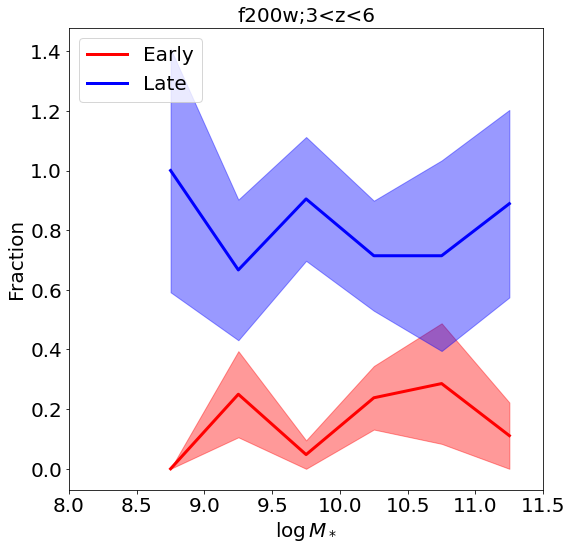

In [39]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_CANDELS

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f160_CANDELS-CEERS.png")

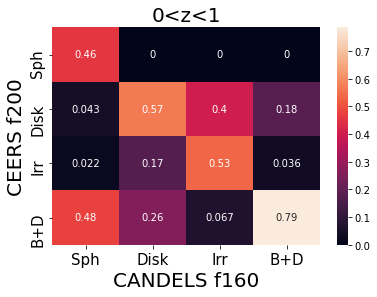

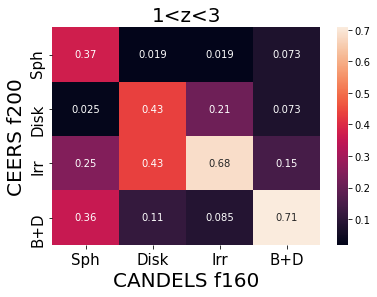

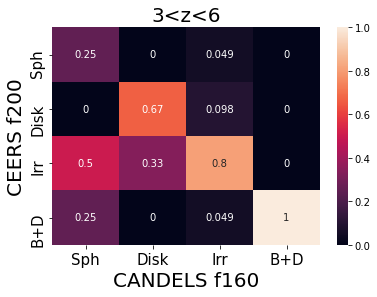

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200, sel.morph_CANDELS,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

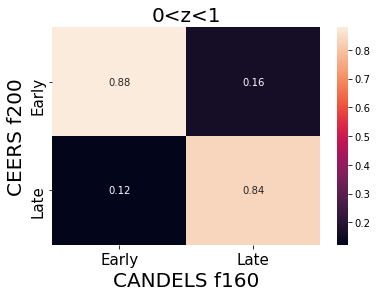

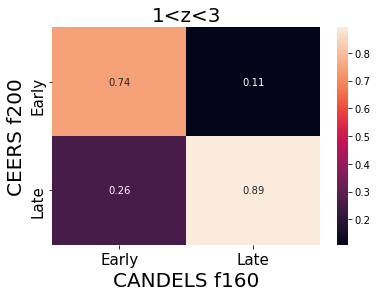

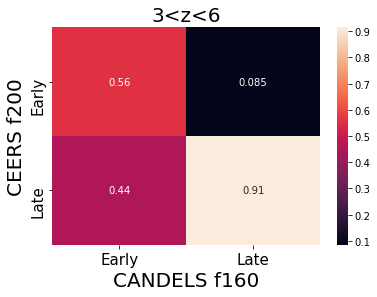

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    ceers_morph = sel.morph_flag_f200.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

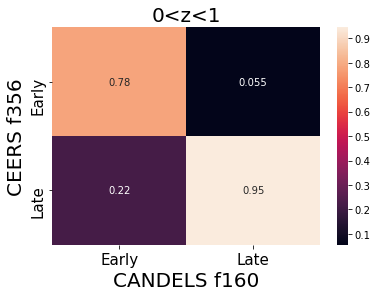

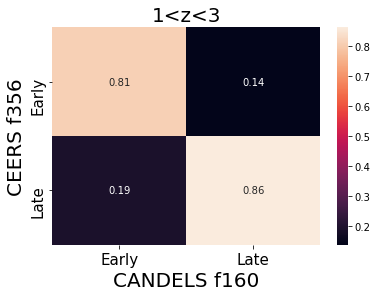

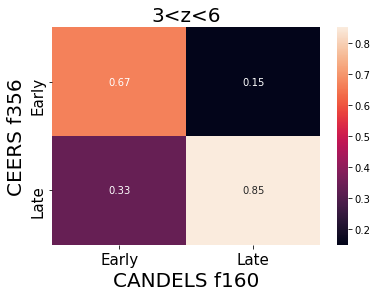

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    ceers_morph = sel.morph_flag_f356.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f356',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

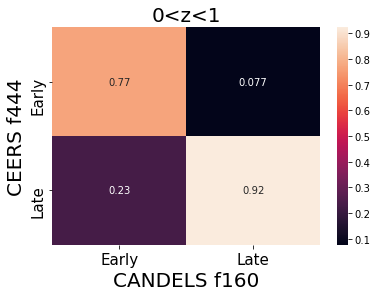

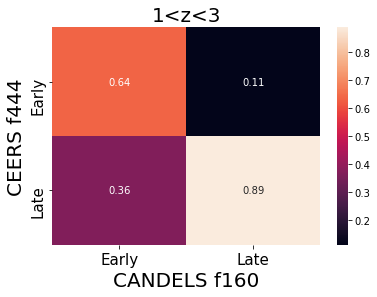

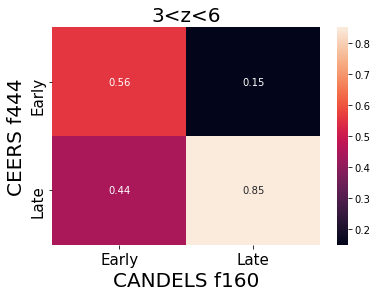

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and mass>9.5 and z>"+str(zlow)+"and z<"+str(zup))


    ceers_morph = sel.morph_flag_f444.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f444',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

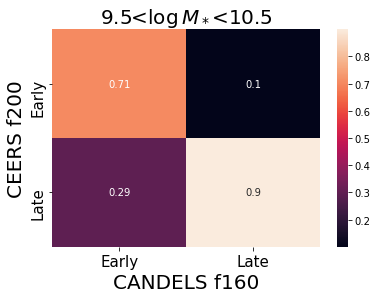

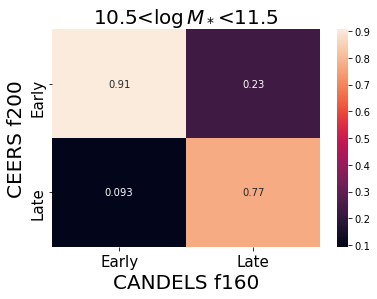

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [9.5,10.5,11.5]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and z<6 and mass>"+str(zlow)+"and mass<"+str(zup))


    ceers_morph = sel.morph_flag_f200.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<$\log M_*$<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

[168 114  76  57  27   9]
[0.06623224 0.05263158 0.06804701 0.06228965 0.13150038 0.        ]
[0.11233919 0.10526316 0.1424793  0.14823666 0.31294406 0.22222222]
[217 312 247 149  83  14]
[0.04329239 0.04692661 0.05213318 0.10421385 0.14457831 0.        ]
[0.07652328 0.07486827 0.08551865 0.16424252 0.24096386 0.14285714]
[ 6 12 21 21  7  9]
[0.         0.         0.         0.         0.08368378 0.        ]
[0.33333333 0.16666667 0.0952381  0.0952381  0.48774479 0.        ]


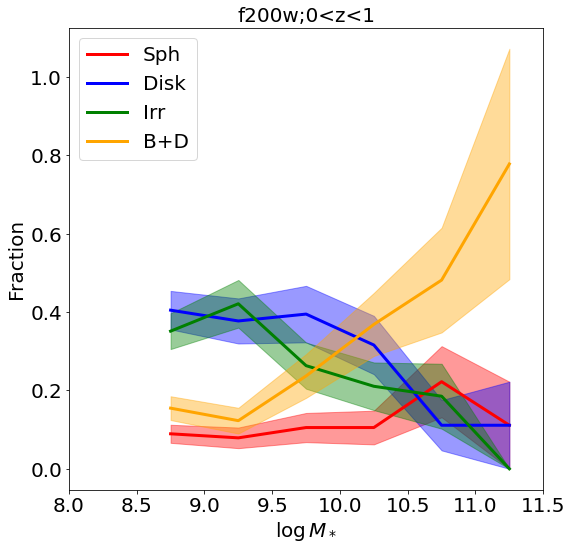

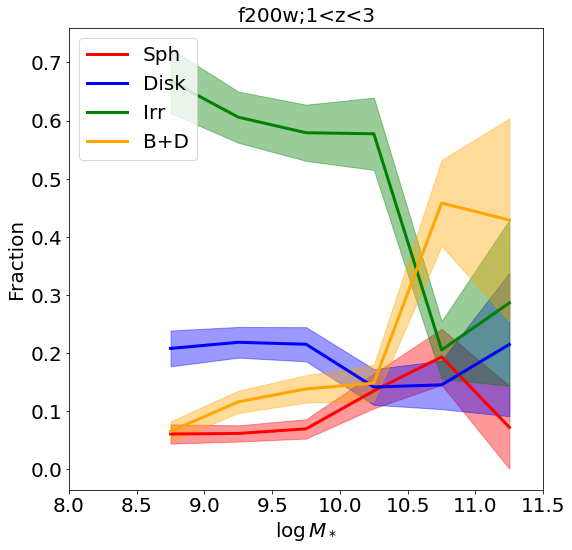

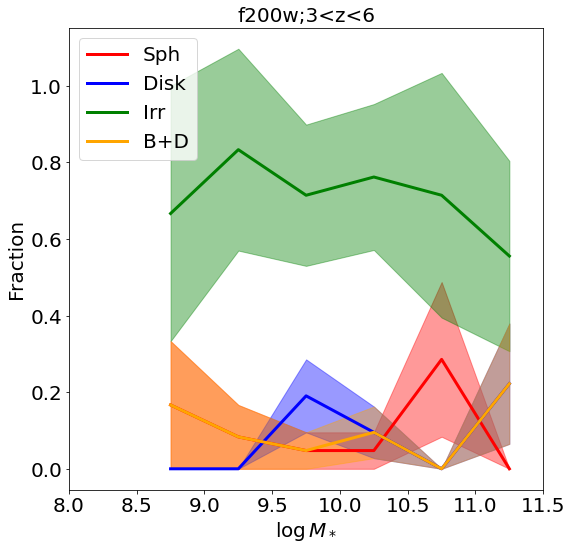

In [49]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f200

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_CEERS-CANDELS"+str(zlow)+"f200.png")

[168 114  76  57  27   9]
[0.15680444 0.11295521 0.14640811 0.19521082 0.28456945 0.30710356]
[0.22414794 0.1852904  0.24832873 0.33110497 0.53024536 0.80400755]
[217 312 247 149  83  14]
[0.0921659  0.12273012 0.15128239 0.21366165 0.32837876 0.0905678 ]
[0.13824885 0.16573142 0.20499291 0.29640546 0.46680196 0.33800363]
[ 6 12 21 21  7  9]
[0.         0.10566243 0.         0.13161581 0.08368378 0.        ]
[0.         0.39433757 0.0952381  0.34457467 0.48774479 0.        ]


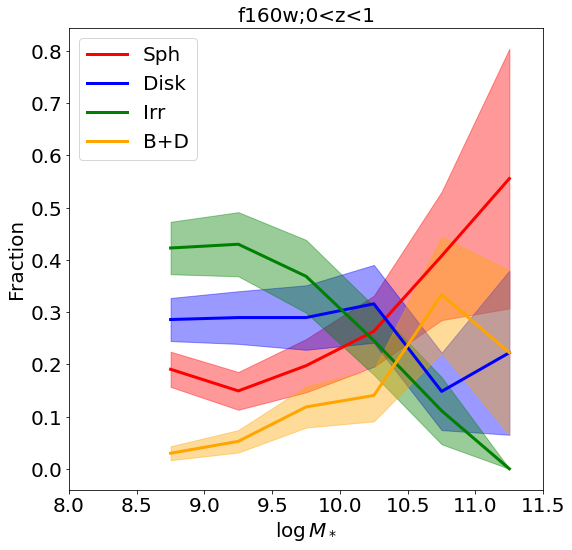

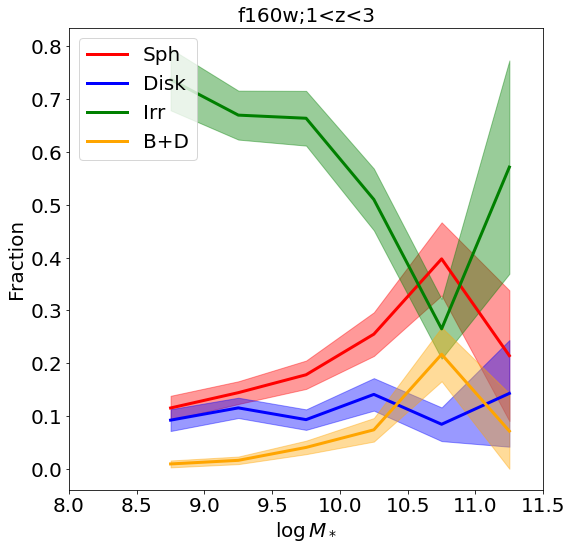

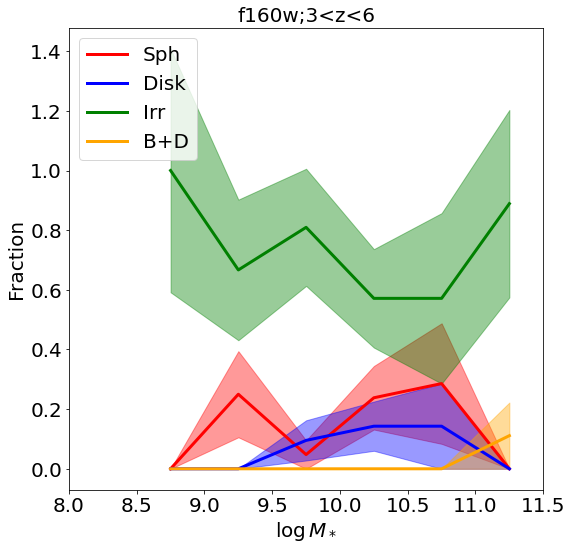

In [50]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup))

    mass=sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_CANDELS

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f160w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")

In [ ]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("z>"+str(zlow)+"and z<"+str(zup)+"and mass>9.5")

    logmass=sel['mass']
    zbest = sel["z"]
    #logsSFR=sel["sSFR"]
    U_V = sel["col29"]-sel["col64"]
    V_J = sel["col64"]-sel["col148"]
    
    #print(sel["col148"])
    morph_flag = sel.morph_flag_f356

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    plt.ylim(-1,2.4)
    plt.xlim(-1,2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    #all,bins = np.histogram(logmass,range=(8.5,11.5),bins=8)
    #sph,bins = np.histogram(logmass[(morph_flag==0)],range=(8.5,11.5),bins=8)
    #dk,bins = np.histogram(logmass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=8)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    #bcenters = (bins[1:] + bins[:-1])/2
    
    plt.scatter(V_J[(morph_flag==0)],U_V[(morph_flag==0)],color='red',s=50)
    plt.scatter(V_J[(morph_flag==1)],U_V[(morph_flag==1)],color='blue',s=40)
    plt.scatter(V_J[(morph_flag==2)],U_V[(morph_flag==2)],color='green',s=40)
    plt.scatter(V_J[(morph_flag==3)],U_V[(morph_flag==3)],color='orange',s=40)
    
    plt.plot([0.8,1.6],[1.3,2.0],color='black')
    plt.plot([-1,0.8],[1.3,1.3],color='black')
    plt.plot([1.6,1.6],[2.0,3.0],color='black')
    #print(all)

    plt.axhline(y=-9.5,ls=':',lw=3,color='black')
    #plt.plot(bcenters,sph/all,color='red',linewidth=3)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,-11,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$V-J$",fontsize=20)
    plt.ylabel("$U-V$",fontsize=20)
    plt.tight_layout()
    plt.savefig(data_path+"UVJ_"+str(zlow)+"f356.png")
    

Morphology - Quenching

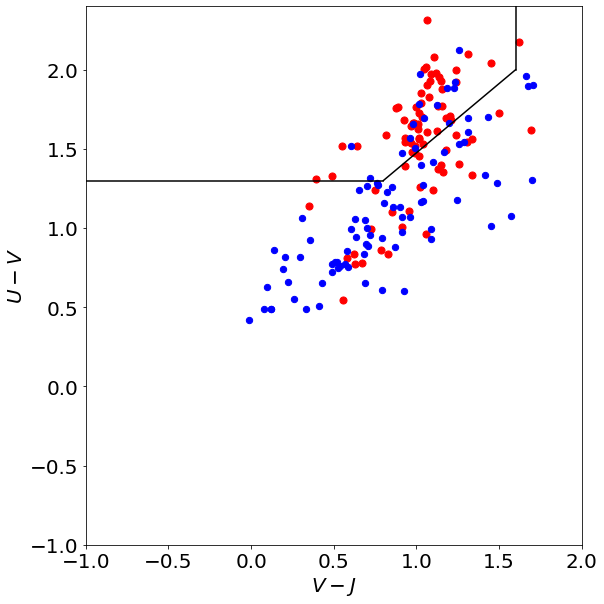

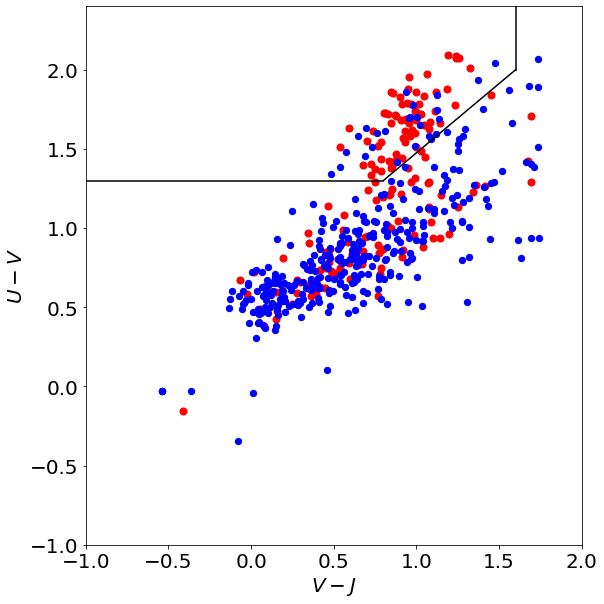

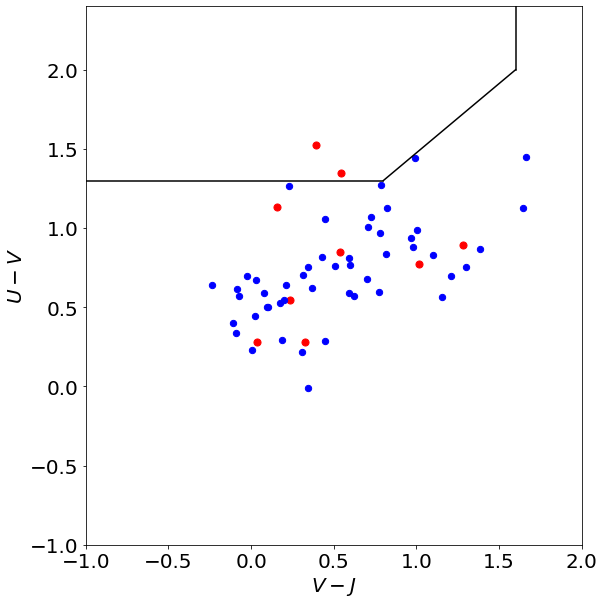

In [41]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup)+"and mass>9.5")

    logmass=sel['mass']
    zbest = sel["z"]
    #logsSFR=sel["sSFR"]
    U_V = sel["col29"]-sel["col64"]
    V_J = sel["col64"]-sel["col148"]
    
    #print(sel["col148"])
    morph_flag = sel.morph_flag_f200
    

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    plt.ylim(-1,2.4)
    plt.xlim(-1,2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    #all,bins = np.histogram(logmass,range=(8.5,11.5),bins=8)
    #sph,bins = np.histogram(logmass[(morph_flag==0)],range=(8.5,11.5),bins=8)
    #dk,bins = np.histogram(logmass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=8)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    #bcenters = (bins[1:] + bins[:-1])/2
    
    plt.scatter(V_J[(morph_flag==0) | (morph_flag==3)],U_V[(morph_flag==0)| (morph_flag==3)],color='red',s=50)
    plt.scatter(V_J[(morph_flag==1) | (morph_flag==2)],U_V[(morph_flag==1)|(morph_flag==2)],color='blue',s=40)
    #plt.scatter(V_J[(morph_flag==2)],U_V[(morph_flag==2)],color='green',s=40)
    #plt.scatter(V_J[(morph_flag==3)],U_V[(morph_flag==3)],color='orange',s=40)
    
    plt.plot([0.8,1.6],[1.3,2.0],color='black')
    plt.plot([-1,0.8],[1.3,1.3],color='black')
    plt.plot([1.6,1.6],[2.0,3.0],color='black')
    #print(all)

    plt.axhline(y=-9.5,ls=':',lw=3,color='black')
    #plt.plot(bcenters,sph/all,color='red',linewidth=3)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,-11,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$V-J$",fontsize=20)
    plt.ylabel("$U-V$",fontsize=20)
    plt.tight_layout()
    plt.savefig(data_path+"UVJ_"+str(zlow)+"f200_CANDELS-CEERS.png")
    

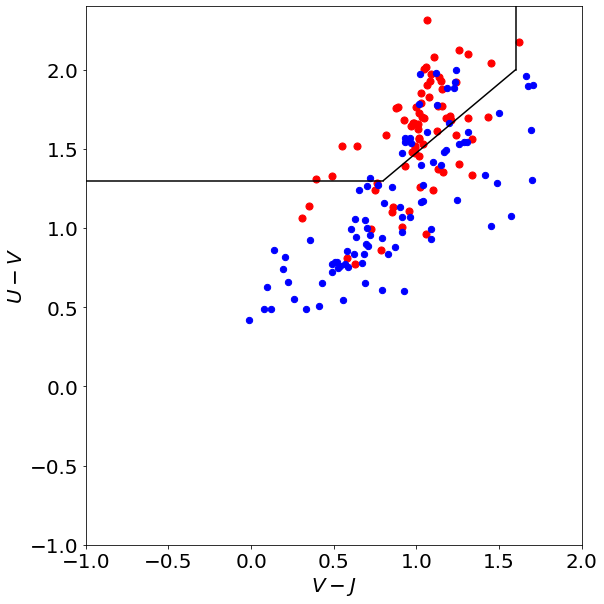

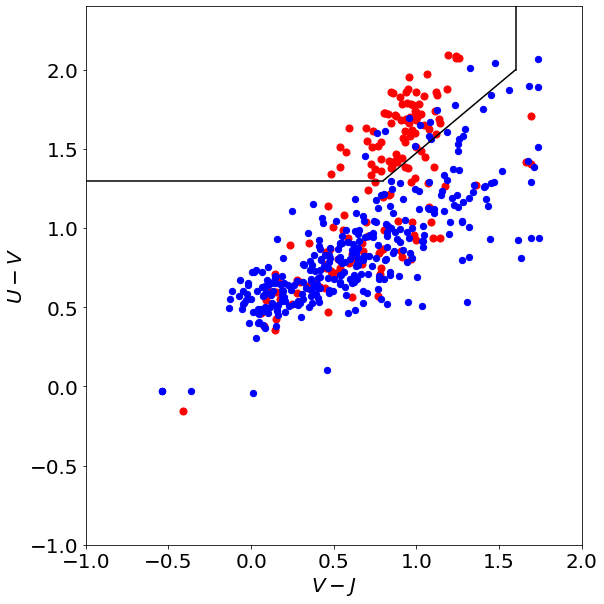

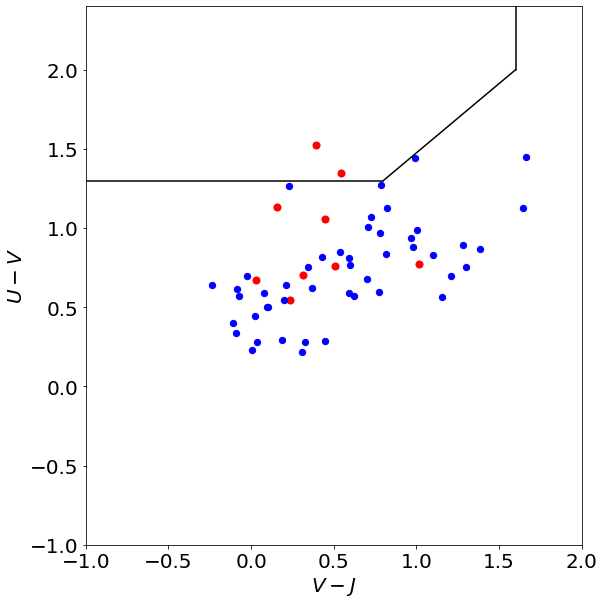

In [42]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("z>"+str(zlow)+"and z<"+str(zup)+"and mass>9.5")

    logmass=sel['mass']
    zbest = sel["z"]
    #logsSFR=sel["sSFR"]
    U_V = sel["col29"]-sel["col64"]
    V_J = sel["col64"]-sel["col148"]
    
    #print(sel["col148"])
    morph_flag = sel.morph_CANDELS
    

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    plt.ylim(-1,2.4)
    plt.xlim(-1,2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    #all,bins = np.histogram(logmass,range=(8.5,11.5),bins=8)
    #sph,bins = np.histogram(logmass[(morph_flag==0)],range=(8.5,11.5),bins=8)
    #dk,bins = np.histogram(logmass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=8)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    #bcenters = (bins[1:] + bins[:-1])/2
    
    plt.scatter(V_J[(morph_flag==0) | (morph_flag==3)],U_V[(morph_flag==0)| (morph_flag==3)],color='red',s=50)
    plt.scatter(V_J[(morph_flag==1) | (morph_flag==2)],U_V[(morph_flag==1)|(morph_flag==2)],color='blue',s=40)
    #plt.scatter(V_J[(morph_flag==2)],U_V[(morph_flag==2)],color='green',s=40)
    #plt.scatter(V_J[(morph_flag==3)],U_V[(morph_flag==3)],color='orange',s=40)
    
    plt.plot([0.8,1.6],[1.3,2.0],color='black')
    plt.plot([-1,0.8],[1.3,1.3],color='black')
    plt.plot([1.6,1.6],[2.0,3.0],color='black')
    #print(all)

    plt.axhline(y=-9.5,ls=':',lw=3,color='black')
    #plt.plot(bcenters,sph/all,color='red',linewidth=3)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,-11,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$V-J$",fontsize=20)
    plt.ylabel("$U-V$",fontsize=20)
    plt.tight_layout()
    plt.savefig(data_path+"UVJ_"+str(zlow)+"f200_CANDELS-CEERS.png")
    